In [1]:
# import necessary modules
from classy import Class
from math import pi

In [2]:
#####################################################
#
# Cosmological parameters and other CLASS parameters
#
#####################################################
common_settings = {# LambdaCDM parameters
                   'h':0.67810,
                   'omega_b':0.02238280,
                   'omega_cdm': 0.1201075,
                   'A_s':2.100549e-09,
                   'tau_reio': 0.05430842}

l_max_scalars = 3000
l_max_tensors = 600

# Note that for l_max_tensors =600 we can keep default precision,
# while for for l_max_tensors = 3000 we would need to import many high precision settings from the file cl_ref.pre    

In [3]:
###############
#    
# call CLASS : scalars only
#
###############
#
M = Class()
M.set(common_settings)
M.set({'output':'tCl,pCl','modes':'s','lensing':'no','n_s':0.9660499,
       'l_max_scalars':l_max_scalars})
M.compute()
cls = M.raw_cl(l_max_scalars)

In [4]:
###############
#    
# call CLASS : tensors only
#
###############
#
M.empty() # reset input parameters to default, before passing a new parameter set
M.set(common_settings)
M.set({'output':'tCl,pCl','modes':'t','lensing':'no','r':0.1,'n_t':0,
       'l_max_tensors':l_max_tensors})
M.compute()
clt = M.raw_cl(l_max_tensors)

In [5]:
###############
#    
# call CLASS : scalars + tensors (only in this case we can get the correct lensed ClBB)
#
###############
#
M.empty() # reset input parameters to default, before passing a new parameter set
M.set(common_settings)
M.set({'output':'tCl,pCl,lCl','modes':'s,t','lensing':'yes','n_s':0.9660499,'r':0.1,'n_t':0,
       'l_max_scalars':l_max_scalars,'l_max_tensors':l_max_tensors})
M.compute()
cl_tot = M.raw_cl(l_max_scalars)
cl_lensed = M.lensed_cl(l_max_scalars)

In [6]:
# modules and esthetic definitions for the plots
#
# uncomment to get plots displayed in notebook
%matplotlib inline
#
import matplotlib
import matplotlib.pyplot as plt
#
font = {'size'   : 16, 'family':'STIXGeneral'}
axislabelfontsize='large'
matplotlib.rc('font', **font)
matplotlib.mathtext.rcParams['legend.fontsize']='medium'
plt.rcParams["figure.figsize"] = [8.0,6.0]

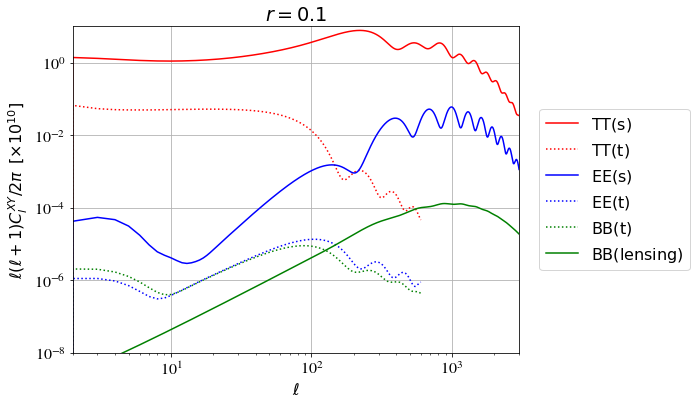

In [7]:
#################
#
# plotting
#
#################
#
plt.xlim([2,l_max_scalars])
plt.ylim([1.e-8,10])
plt.xlabel(r"$\ell$")
plt.ylabel(r"$\ell (\ell+1) C_l^{XY} / 2 \pi \,\,\, [\times 10^{10}]$")
plt.title(r"$r=0.1$")
plt.grid()
#
ell = cl_tot['ell']
ellt = clt['ell']
factor = 1.e10*ell*(ell+1.)/2./pi
factort = 1.e10*ellt*(ellt+1.)/2./pi
#
plt.loglog(ell,factor*cls['tt'],'r-',label=r'$\mathrm{TT(s)}$')
plt.loglog(ellt,factort*clt['tt'],'r:',label=r'$\mathrm{TT(t)}$')
plt.loglog(ell,factor*cls['ee'],'b-',label=r'$\mathrm{EE(s)}$')
plt.loglog(ellt,factort*clt['ee'],'b:',label=r'$\mathrm{EE(t)}$')
plt.loglog(ellt,factort*clt['bb'],'g:',label=r'$\mathrm{BB(t)}$')
plt.loglog(ell,factor*(cl_lensed['bb']-cl_tot['bb']),'g-',label=r'$\mathrm{BB(lensing)}$')
plt.legend(loc='right',bbox_to_anchor=(1.4, 0.5))

In [ ]:
plt.savefig('cl_ST.pdf',bbox_inches='tight')